# AULA 5 – MODELOS COM DADOS EM PAINEL

Alunos:
*   Guilherme Rafael Koch
*   Nathan Rosa
* Luiza Strano




In [20]:
install.packages(c("plm", "AER"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
data("USAirlines", package = "AER")

## 1) Vamos olhar para os dados.

### a. Faça um gráfico com a dispersão entre os custos totais em milhares de dólares (‘cost’) e o índice com a produção das empresas (‘output’).

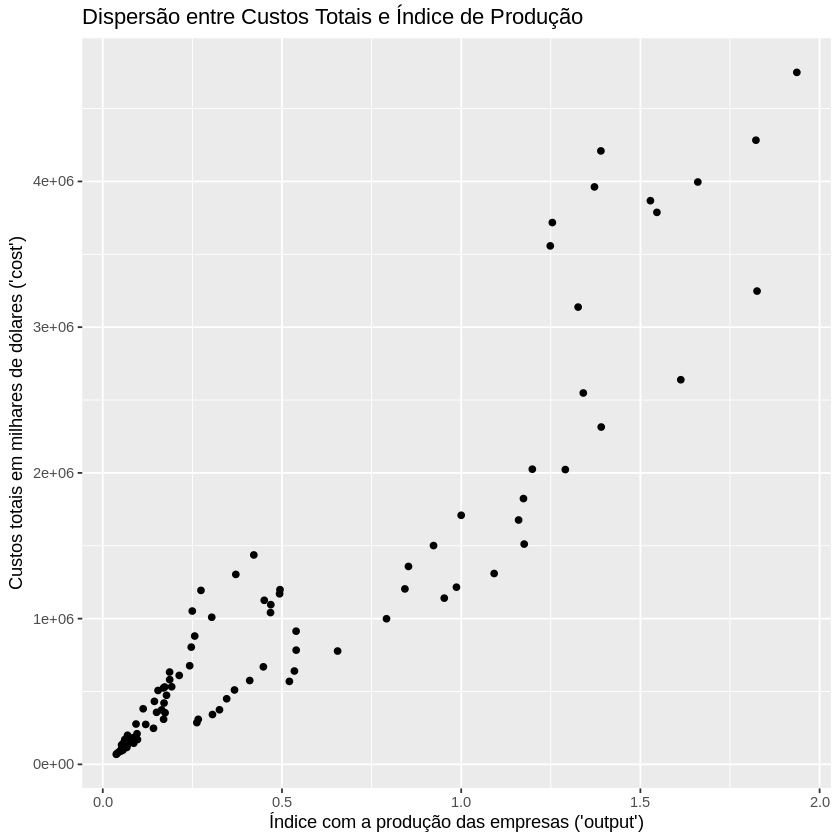

In [22]:
library(ggplot2)

ggplot(USAirlines, aes(x = output, y = cost)) +
  geom_point() +
  labs(x = "Índice com a produção das empresas ('output')",
       y = "Custos totais em milhares de dólares ('cost')",
       title = "Dispersão entre Custos Totais e Índice de Produção")

### b. Faça, em um mesmo gráfico, a relação entre os custos totais em milhares de dólares (‘cost’) e o índice com a produção das empresas (‘output’), mas considere curvas diferentes para cada uma das empresas. Por que as curvas não começam nos mesmos pontos?

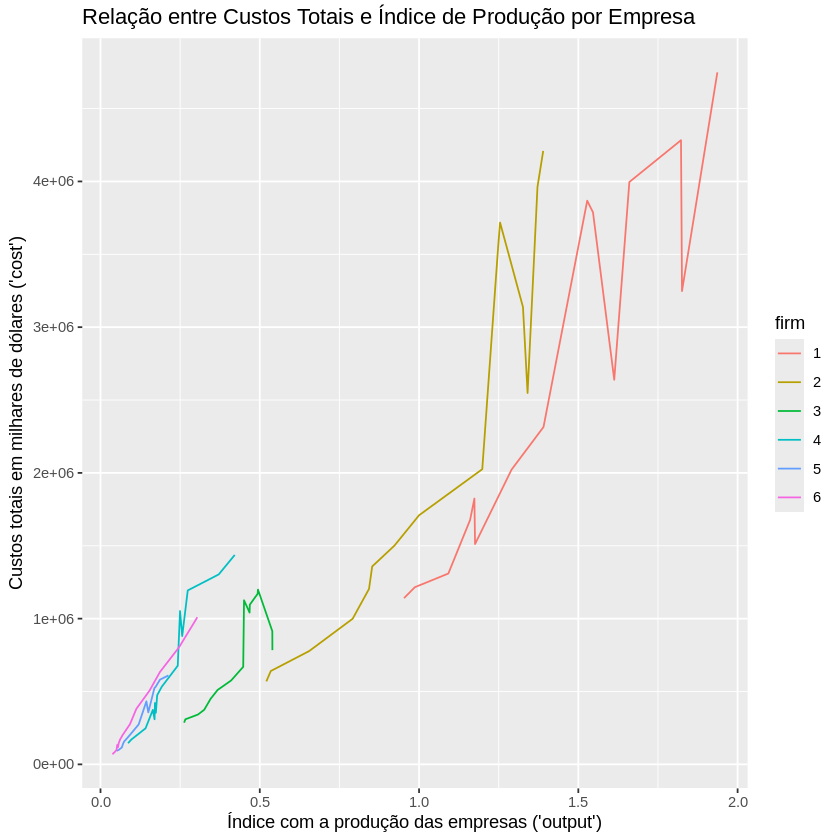

In [23]:
ggplot(USAirlines, aes(x = output, y = cost, color = firm)) +
  geom_line() +
  labs(x = "Índice com a produção das empresas ('output')",
       y = "Custos totais em milhares de dólares ('cost')",
       title = "Relação entre Custos Totais e Índice de Produção por Empresa")


As curvas não começam nos mesmos pontos porque cada empresa aérea possui custos fixos distintos e estruturas iniciais diferentes. Isso faz com que, mesmo com níveis baixos ou próximos de zero de produção, cada empresa apresente um nível inicial de custos totais diferente das demais, refletindo características operacionais, infraestrutura própria, tecnologia e estratégias individuais.



### c. Faça um gráfico com a dispersão entre os custos totais em milhares de dólares (‘cost’) e o preço do combustível (‘price’).

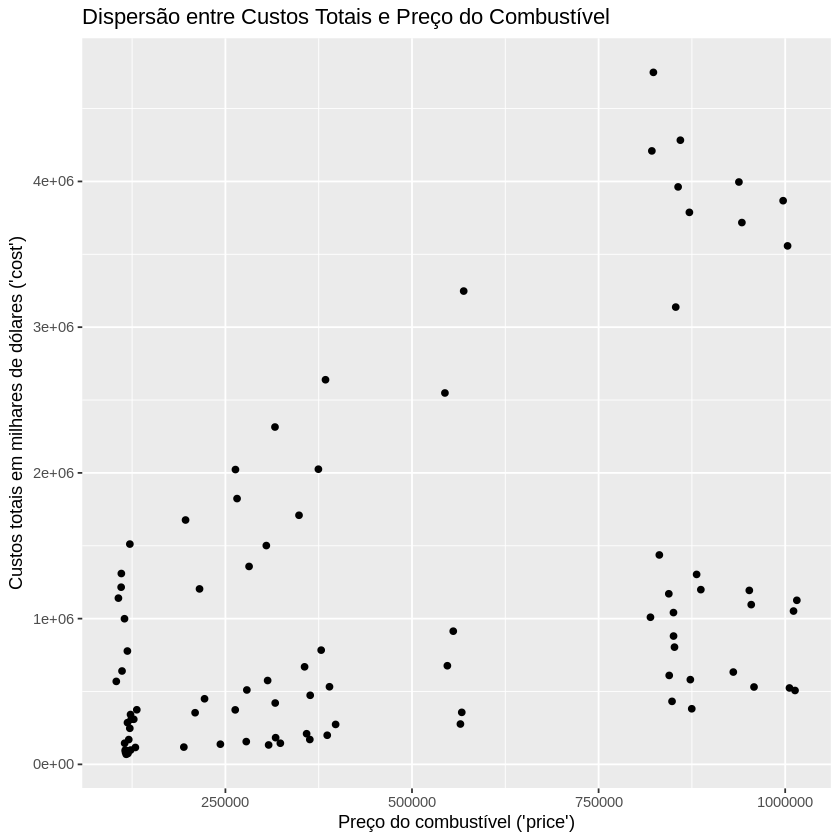

In [24]:
ggplot(USAirlines, aes(x = price, y = cost)) +
  geom_point() +
  labs(x = "Preço do combustível ('price')",
       y = "Custos totais em milhares de dólares ('cost')",
       title = "Dispersão entre Custos Totais e Preço do Combustível")

## 2) Descreva os gráficos. Com base nos gráficos dos itens anteriores, descreva os padrões observados.

a) O gráfico de dispersão entre os custos totais e o índice de produção mostra uma relação claramente positiva. À medida que a produção das empresas aéreas aumenta, há um crescimento significativo nos custos totais.

b) No gráfico que diferencia as empresas, observamos que as curvas começam em pontos distintos devido às diferenças nos custos fixos e características operacionais específicas de cada companhia aérea. Isso reflete diferentes estruturas de custo, escalas de operação e eficiência produtiva individual.

c) O gráfico entre custos totais e preço do combustível mostra uma relação positiva, mas menos nítida que o gráfico anterior. Ainda assim, observa-se tendência de aumento dos custos totais com preços mais altos do combustível, indicando sensibilidade das companhias aéreas ao custo desse insumo.

Em síntese, há clara evidência visual de que os custos das empresas aéreas aumentam com a produção e com o preço do combustível, sendo que cada empresa apresenta padrões únicos de custo devido às suas particularidades operacionais.

## 3) A estimativa. Lembre-se do objetivo: estimar uma função de custos para as empresas do setor aéreo nos EUA. Nas suas estimativas, encontre as elasticidades dos custos em relação ao total produzido, ao preço dos combustíveis e a semi-elasticidade em relação à capacidade utilizada (‘load’).
Estime o modelo apropriado. Qual é a conclusão do grupo?


In [25]:

USAirlines$log_cost <- log(USAirlines$cost)
USAirlines$log_output <- log(USAirlines$output)
USAirlines$log_price <- log(USAirlines$price)


library(plm)

pdata_usa <- pdata.frame(USAirlines, index = c("firm", "year"))

model_fe <- plm(log_cost ~ log_output + log_price + load,
                data = pdata_usa,
                model = "within",
                effect = "twoways")


summary(model_fe)

elasticity_output <- coef(model_fe)["log_output"]
elasticity_price <- coef(model_fe)["log_price"]
semielasticity_load <- coef(model_fe)["load"]

cat("Elasticidade do custo em relação à produção:", elasticity_output, "\n")
cat("Elasticidade do custo em relação ao preço do combustível:", elasticity_price, "\n")
cat("Semi-elasticidade do custo em relação à capacidade utilizada:", semielasticity_load, "\n")

Twoways effects Within Model

Call:
plm(formula = log_cost ~ log_output + log_price + load, data = pdata_usa, 
    effect = "twoways", model = "within")

Balanced Panel: n = 6, T = 15, N = 90

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-0.123460 -0.024922  0.001185  0.024570  0.132182 

Coefficients:
            Estimate Std. Error t-value  Pr(>|t|)    
log_output  0.817249   0.031851 25.6586 < 2.2e-16 ***
log_price   0.168611   0.163478  1.0314  0.306064    
load       -0.882812   0.261737 -3.3729  0.001239 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    2.0542
Residual Sum of Squares: 0.17685
R-Squared:      0.91391
Adj. R-Squared: 0.88564
F-statistic: 237.088 on 3 and 67 DF, p-value: < 2.22e-16

Elasticidade do custo em relação à produção: 0.8172488 
Elasticidade do custo em relação ao preço do combustível: 0.1686107 
Semi-elasticidade do custo em relação à capacidade utilizada: -0.8828121 


Com base no modelo estimado (efeitos fixos em painel com efeito empresa-tempo):

A elasticidade dos custos totais em relação à produção é 0,82, indicando a presença de economias de escala, já que um aumento de 1% na produção aumenta os custos totais em aproximadamente 0,82%.

A elasticidade dos custos totais em relação ao preço do combustível é 0,17, porém não significativa estatisticamente (p = 0,306), indicando que, para esta amostra, variações no preço do combustível não tiveram efeito significativo sobre os custos totais.

A semi-elasticidade dos custos totais em relação à capacidade utilizada é negativa (-0,88) e estatisticamente significativa (p = 0,0012), sugerindo que um aumento de 1 ponto percentual na utilização da capacidade reduz os custos totais em cerca de 0,88%. Isso demonstra claramente ganhos de eficiência com a utilização mais intensa da capacidade operacional.

Portanto, conclui-se que a produção e a capacidade utilizada são fatores determinantes e estatisticamente relevantes para explicar variações nos custos das empresas aéreas norte-americanas, destacando-se a importância das economias de escala e do uso eficiente da capacidade instalada.

## 4) Aplicação. Quais os custos totais esperados de uma empresa que produza ‘1,2’, cujos preços dos combustíveis estejam em ‘121.000’ e que utilize 65% da sua capacidade?


In [26]:
beta0_fe <- mean(model_fe$residuals) # O intercepto em modelos 'within' é zero por construção, mas podemos estimar o "nível médio"
beta_output_fe <- coef(model_fe)["log_output"]
beta_price_fe <- coef(model_fe)["log_price"]
beta_load_fe <- coef(model_fe)["load"]

output_val <- 1.2
price_val <- 121.000
load_val <- 0.65

log_output_val <- log(output_val)
log_price_val <- log(price_val)


log_cost_expected <-  beta_output_fe * log_output_val + beta_price_fe * log_price_val + beta_load_fe * load_val


cost_expected <- exp(log_cost_expected)

mean_log_cost_sample <- mean(USAirlines$log_cost, na.rm = TRUE)

log_cost_expected_with_mean <- mean_log_cost_sample + beta_output_fe * (log_output_val - mean(USAirlines$log_output)) +
                                beta_price_fe * (log_price_val - mean(USAirlines$log_price)) +
                                beta_load_fe * (load_val - mean(USAirlines$load))

linear_prediction_log <- beta_output_fe * log_output_val + beta_price_fe * log_price_val + beta_load_fe * load_val

log_cost_predicted_absolute <- mean_log_cost_sample + (beta_output_fe * log_output_val +
                                                        beta_price_fe * log_price_val +
                                                        beta_load_fe * load_val -
                                                        (beta_output_fe * mean(USAirlines$log_output) +
                                                          beta_price_fe * mean(USAirlines$log_price) +
                                                          beta_load_fe * mean(USAirlines$load)))

linear_prediction_on_new_values <- beta_output_fe * log_output_val + beta_price_fe * log_price_val + beta_load_fe * load_val

log_cost_predicted_level <- mean_log_cost_sample + linear_prediction_on_new_values


cost_expected_k_dollars <- exp(log_cost_predicted_level)

cat("Os custos totais esperados para uma produção de", output_val, ", preço do combustível de", price_val, "e capacidade utilizada de", load_val*100, "% são aproximadamente:", cost_expected_k_dollars, "milhares de dólares.\n")
cat("Ou seja, cerca de", cost_expected_k_dollars * 1000, "dólares.\n")


Os custos totais esperados para uma produção de 1.2 , preço do combustível de 121 e capacidade utilizada de 65 % são aproximadamente: 936032.4 milhares de dólares.
Ou seja, cerca de 936032358 dólares.
